In [8]:
# Import libraries
import numpy as np
import os
import matplotlib.pyplot as plt

from scipy.fftpack import dct
import numpy as np


In [9]:
# Define data pre-processing functions 

# Import the mnist dataset 
def import_mnist_data(num_img):
    # Unzip the mnist data
    if not os.path.exists("mnist_dataset/"):
        !unzip mnist_dataset.zip
    # Load the mnist data
    # Ignore the first column of the data (the label)
    data = np.loadtxt("mnist_dataset/mnist_test.csv", delimiter=",", max_rows=num_img, usecols=range(1,785))
    data = data.reshape(num_img, 784)
    return data

# Sparsify the data by setting all values below a threshold to 0
def sparsify_data(data, threshold):
    sparse_data = np.copy(data)
    for i in range(sparse_data.shape[0]):
        for j in range(sparse_data.shape[1]):
            sparse_data[i,j] = 1 if sparse_data[i,j] > threshold else 0

    return sparse_data

# Generates a random measurement matrix with normalized columns
def make_meas_matrix(rows, cols):
    # Generate a matrix of numbers from the standard normal distribution
    meas_matrix = np.random.randn(rows, cols)
    # Normalize the columns of the matrix
    for i in range(cols):
        meas_matrix[:,i] = meas_matrix[:,i] / np.linalg.norm(meas_matrix[:,i])

    return meas_matrix


#we can  use this too and see
def make_dct_meas_matrix(rows, cols):
    D = dct(np.eye(cols), norm='ortho')  
    return D[:rows, :]  




# Generate measurements from the data using the measurement matrix
def get_measurements(data, meas_matrix):
    return meas_matrix @ data.T

# Plot the original image and the sparsified image
def plot_images(original_data, sparsified_data):
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(original_data.reshape(28,28), cmap='gray_r', vmin=0, vmax=255)
    axs[0].set_title("Original Image")
    axs[1].imshow(sparsified_data.reshape(28,28), cmap='gray_r', vmin=0, vmax=1)
    axs[1].set_title("Sparsified Image")
    plt.show()

# Plot the original image and the estimated image
def plot_est_images(original_data, est_data):
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(original_data.reshape(28,28), cmap='gray_r', vmin=0, vmax=1)
    axs[0].set_title("Original Image")
    axs[1].imshow(est_data.reshape(28,28), cmap='gray_r', vmin=0, vmax=1)
    axs[1].set_title("Reconstructed Image")
    plt.show()

def plot_meas_matrix(meas_matrix):
    plt.imshow(meas_matrix, cmap='rainbow', vmin=-1, vmax=1)
    plt.title("Measurement Matrix")
    plt.show()

(1, 784)
(1, 784)


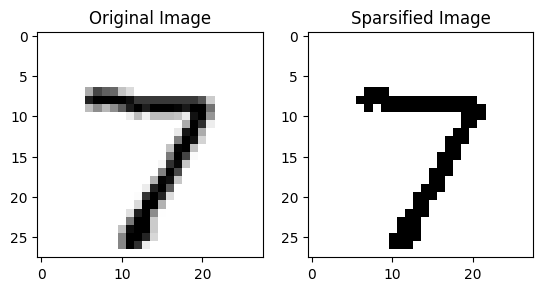

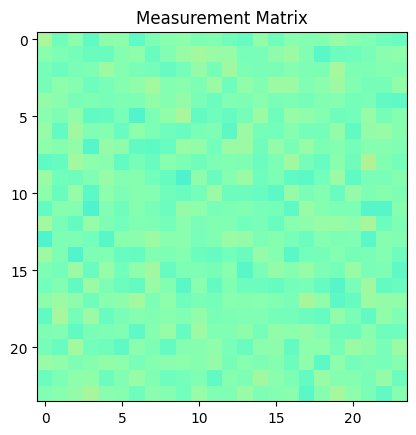

(200, 1)


In [10]:
# Testing out data pre-processing functions

data = import_mnist_data(1)
print(data.shape)

sparse_data = sparsify_data(data, 100) #anything below 100 is = zero
print(sparse_data.shape)

plot_images(data, sparse_data)

meas_matrix = make_meas_matrix(200,784)
plot_meas_matrix(meas_matrix[0:24,0:24])

measurement = get_measurements(sparse_data, meas_matrix)
print(measurement.shape)

In [11]:
# # Testing out data pre-processing functions, using the DCT measurement matrix

# data = import_mnist_data(1)
# print(data.shape)

# sparse_data = sparsify_data(data, 100) #anything below 100 is = zero
# print(sparse_data.shape)

# plot_images(data, sparse_data)

# meas_matrix = make_dct_meas_matrix(200,784)
# # plot_meas_matrix(make_dct_meas_matrix[0:24,0:24])

# measurement = get_measurements(sparse_data, meas_matrix)
# print(measurement.shape)

In [12]:
# Orthoginal Matching Pursuit Algorithm
def omp(meas_matrix, measurement, err_threshold):
    estimate = np.zeros((meas_matrix.shape[1], 1))
    support = np.empty(0, dtype=int)
    residual = measurement

    while np.linalg.norm(residual) > err_threshold:
        # Matching step
        h = meas_matrix.T @ residual
        # Support identification step
        k = np.argmax(abs(h))
        # Augment the support vector
        support = np.append(support, k)
        support = np.sort(support)
        # Update estimate
        meas_matrix_s = meas_matrix[:,support]
        estimate[support,:] = np.linalg.inv(meas_matrix_s.T @ meas_matrix_s) @ (meas_matrix_s.T @ measurement)
        # Update residual
        residual = measurement - meas_matrix @ estimate

    return estimate

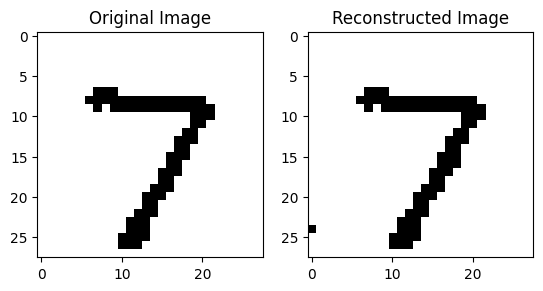

In [13]:
# Test out OMP algorithm 

data = import_mnist_data(1)
sparse_data = sparsify_data(data, 100)
meas_matrix = make_meas_matrix(500,784)
measurement = get_measurements(sparse_data, meas_matrix)

estimate = omp(meas_matrix, measurement, 1e-5)
estimate = sparsify_data(abs(estimate), 0)
plot_est_images(sparse_data, estimate)

Iterative Shrinkage threshoding algorithm

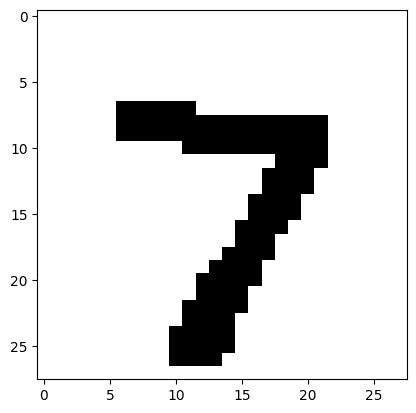

In [14]:
data = import_mnist_data(1)
plt.imshow(data.reshape(28,28), cmap='gray_r', vmin=0, vmax=1)

In [15]:
def soft_thresholding(x, threshold):
    return np.sign(x) * np.maximum(np.abs(x) - threshold, 0)

Update norm: 0.02706943522063118
Iter 0: Update norm = 0.027069
Update norm: 0.027046289432444894
Iter 1: Update norm = 0.027046
Update norm: 0.027002578382899874
Iter 2: Update norm = 0.027003
Update norm: 0.02694846810863491
Iter 3: Update norm = 0.026948
Update norm: 0.026929182533717195
Iter 4: Update norm = 0.026929
Update norm: 0.02690402468931639
Iter 5: Update norm = 0.026904
Update norm: 0.026947387408083633
Iter 6: Update norm = 0.026947
Update norm: 0.026977983994099623
Iter 7: Update norm = 0.026978
Update norm: 0.026952402393527086
Iter 8: Update norm = 0.026952
Update norm: 0.026937442603197623
Iter 9: Update norm = 0.026937
Update norm: 0.026939443185832752
Iter 10: Update norm = 0.026939
Update norm: 0.02696654686026025
Iter 11: Update norm = 0.026967
Update norm: 0.027016353858650186
Iter 12: Update norm = 0.027016
Update norm: 0.026968476115003356
Iter 13: Update norm = 0.026968
Update norm: 0.02697400998721228
Iter 14: Update norm = 0.026974
Update norm: 0.0269848750

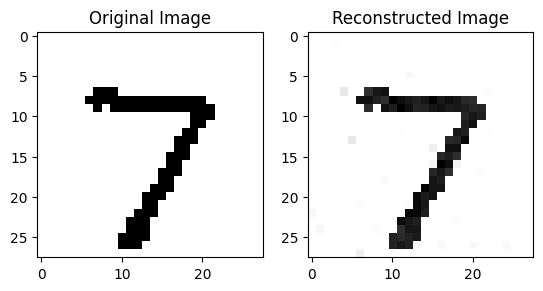

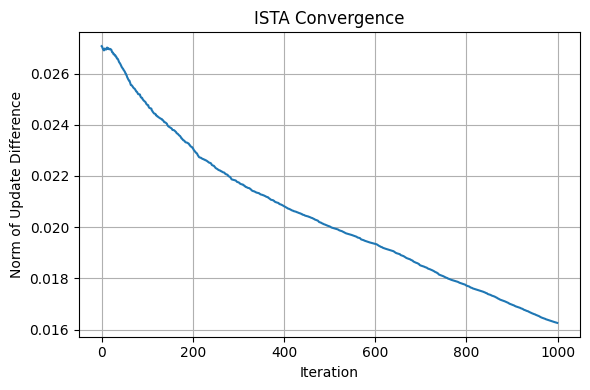

In [20]:
zt= np.zeros((784,1)) #some randnm initial guesss
eta=0.01 #need to tune

convergence=[]

for t in range(1000):
    update= zt- 2*eta*meas_matrix.T@(meas_matrix@zt-measurement)
    zt=soft_thresholding(update,0.001)
    print("Update norm:", np.linalg.norm(update - zt))
    

    diff = np.linalg.norm(update - zt)
    convergence.append(diff)
    print(f"Iter {t}: Update norm = {diff:.6f}")
    



plot_est_images(sparse_data, zt)


#convergence plot 

plt.figure(figsize=(6, 4))
plt.plot(convergence)
plt.xlabel("Iteration")
plt.ylabel("Norm of Update Difference")
plt.title("ISTA Convergence")
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
#step size tuning- faster convergence

Iter 0: Update norm = 0.027901
Iter 1: Update norm = 0.027899
Iter 2: Update norm = 0.027913
Iter 3: Update norm = 0.027859
Iter 4: Update norm = 0.027914
Iter 5: Update norm = 0.027961
Iter 6: Update norm = 0.027917
Iter 7: Update norm = 0.027821
Iter 8: Update norm = 0.027931
Iter 9: Update norm = 0.027943
Iter 10: Update norm = 0.027969
Iter 11: Update norm = 0.027938
Iter 12: Update norm = 0.027867
Iter 13: Update norm = 0.027946
Iter 14: Update norm = 0.027948
Iter 15: Update norm = 0.027948
Iter 16: Update norm = 0.027962
Iter 17: Update norm = 0.027976
Iter 18: Update norm = 0.027962
Iter 19: Update norm = 0.027934
Iter 20: Update norm = 0.027934
Iter 21: Update norm = 0.027923
Iter 22: Update norm = 0.027887
Iter 23: Update norm = 0.027907
Iter 24: Update norm = 0.027851
Iter 25: Update norm = 0.027825
Iter 26: Update norm = 0.027771
Iter 27: Update norm = 0.027754
Iter 28: Update norm = 0.027742
Iter 29: Update norm = 0.027703
Iter 30: Update norm = 0.027635
Iter 31: Update no

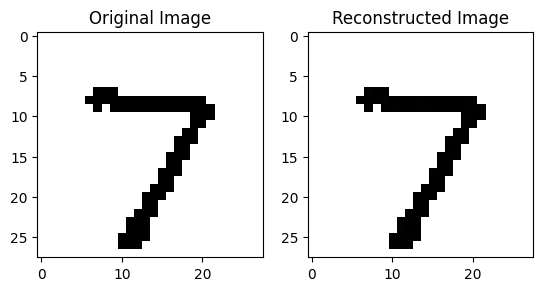

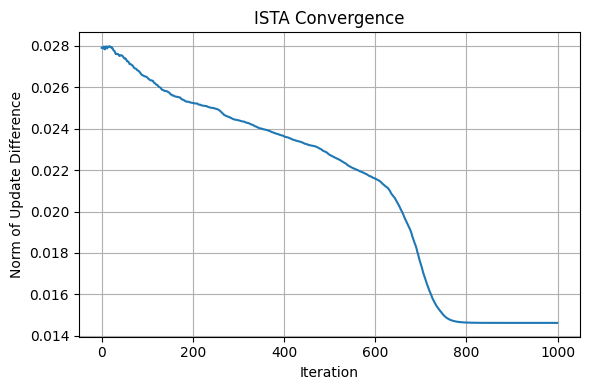

In [19]:

L = np.linalg.norm(meas_matrix.T @ meas_matrix, 2)  # Lipschitz constant
eta = 1 / (2 * L)  


zt = np.zeros((784, 1)) 
convergence = []


for t in range(1000):
    update = zt - 2 * eta * meas_matrix.T @ (meas_matrix @ zt - measurement)
    zt = soft_thresholding(update, 0.001)

    diff = np.linalg.norm(update - zt)
    convergence.append(diff)
    print(f"Iter {t}: Update norm = {diff:.6f}")


plot_est_images(sparse_data, zt)

plt.figure(figsize=(6, 4))
plt.plot(convergence)
plt.xlabel("Iteration")
plt.ylabel("Norm of Update Difference")
plt.title("ISTA Convergence")
plt.grid(True)
plt.tight_layout()
plt.show()
